In [1]:

using Plots
using LinearAlgebra
using ProgressMeter
using PolyChaos
using ITensors
using NDTensors
using ITensorMPS
using Observers
using JLD2
using Base.Threads

include("Chain_mapping_module.jl")
include("HamiltonianBuilding.jl")
using .Chain_mapping
using .HamiltonianBuilding

In [2]:
using Pkg;
Pkg.status("ITensors") #some versions return error related to "Op" parameter name

Threads.nthreads()  # Check number of threads available

Status `C:\Users\ben_b\.julia\environments\v1.11\Project.toml`
⌅ [9136182c] ITensors v0.6.21
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


8

norm(ψ_init) = 1.0
1 - inner(ψ2, ψ) = 0.0 - 0.0im
After sweep 1: maxlinkdim=7 maxerr=7.77E-16 current_time=0.0 - 0.1im time=16.687
 16.941905 seconds (94.85 M allocations: 5.889 GiB, 3.12% gc time, 94.47% compilation time: <1% of which was recompilation)
sim_t = 0.1
After sweep 1: maxlinkdim=10 maxerr=6.67E-16 current_time=0.0 - 0.1im time=1.436
  1.437323 seconds (20.70 M allocations: 2.782 GiB, 11.01% gc time, 2.06% compilation time)
sim_t = 0.2
After sweep 1: maxlinkdim=10 maxerr=6.66E-16 current_time=0.0 - 0.1im time=1.603
  1.604147 seconds (23.82 M allocations: 3.249 GiB, 9.90% gc time)
sim_t = 0.30000000000000004
After sweep 1: maxlinkdim=10 maxerr=7.78E-16 current_time=0.0 - 0.1im time=2.16
  2.161456 seconds (23.65 M allocations: 3.208 GiB, 7.35% gc time, 26.13% compilation time)
sim_t = 0.4
After sweep 1: maxlinkdim=10 maxerr=7.81E-16 current_time=0.0 - 0.1im time=1.584
  1.584885 seconds (23.57 M allocations: 3.191 GiB, 9.58% gc time)
sim_t = 0.5
Time taken for enrichment
1 

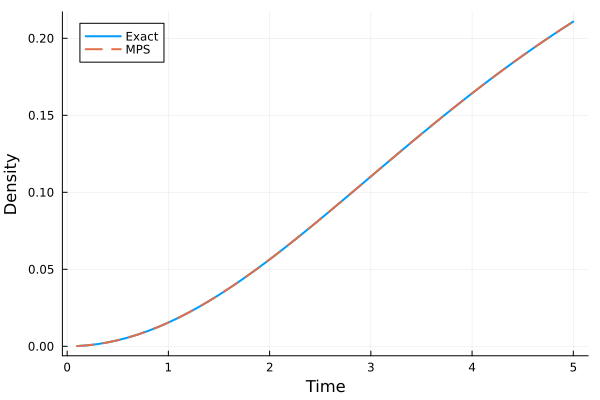

In [3]:

function vars()
    P = Base_params();
    P.N_L = 0
    P.N_R = 100
    P.Ns = 1
    P.N_chain = 50
    P.β_L = 10
    P.β_R = 10
    P.μ_L = 0.0
    P.μ_R = 0.0
    P.Γ_L = 0.01
    P.Γ_R = 0.01
    P.D = 1
    P.spec_fun_type = "ellipse"
    P.symmetry_subspace = "Number conserving"
    P.bath_mode_type = "Fermion"
    P.sys_mode_type = "Fermion"
    P.ϵ = 0
    P.tc = 0
    P.init_occ = 0
    P.U = 0
    P.δt = 0.1
    P.T = 50
    P.Kr_cutoff = 1e-10
    P.k1 = 3
    P.τ_Krylov = 1
    P.tdvp_cutoff = 1e-9
    P.minbonddim = 10
    P.maxbonddim = 100
    P.T_enrich = 5
    P.n_enrich = 5
    return P
end;

P = vars()
P.β_L = 10
P.β_R = 10
P.D = 1
P.Γ_R = 0.1
P.init_occ = 0
P.T = 5
P.tdvp_cutoff = 1e-10
DP = DP_initialisation(P);

##propagates MPS
ψ, obs = propagate_MPS(P, DP;enrich_bool=true)
MPS_corrs = obs.corr

##propagates single particle correlation matrix
exact_corrs = propagate_correlations(P,DP)

exact_den = [corr[1,1] for corr in exact_corrs]
MPS_den = [corr[1,1] for corr in MPS_corrs]
Plots.plot(DP.times,real.(exact_den),label="Exact",lw=2)
Plots.plot!(DP.times,real.(MPS_den),label="MPS",lw=2,linestyle=:dash,xlabel="Time",ylabel="Density")

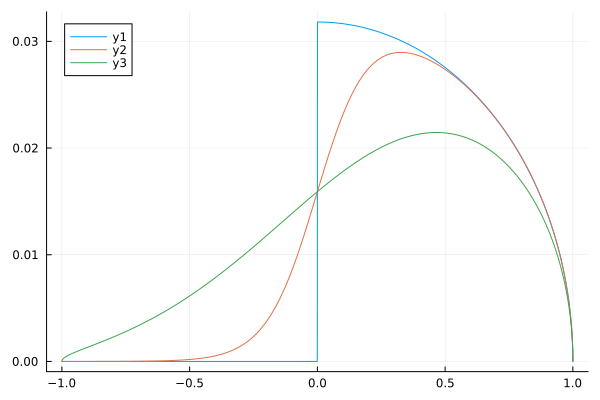

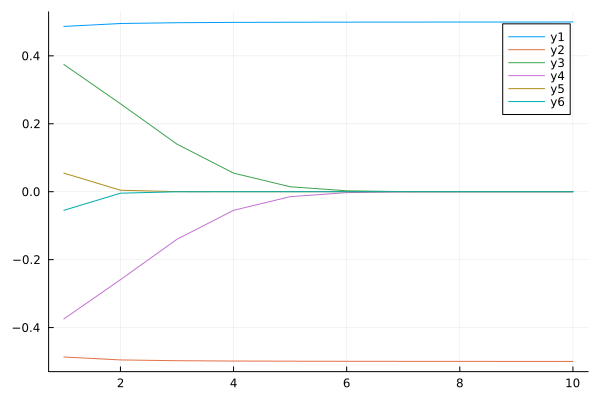

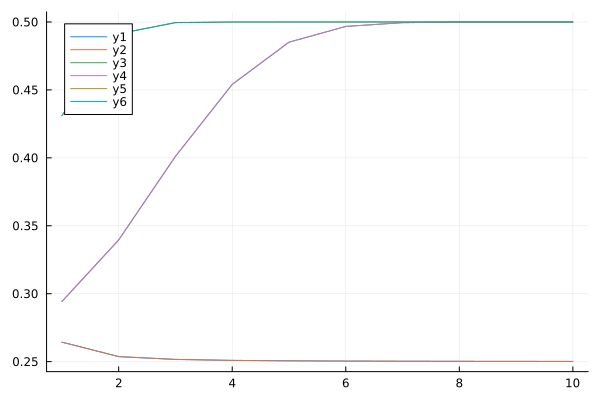

In [4]:
###Reproducing Figure 1 in https://iopscience.iop.org/article/10.1088/1742-5468/ac729b/pdf


##My definition of Γ is different by a factor of π/2
P.Γ_R = 0.157
P.β_R = 10000
w = LinRange(-P.D,P.D,10000)

side = "right"
t_empty_1,E_empty_1 = orthopol_chain(1,side,P)
t_filled_1,E_filled_1 = orthopol_chain(2,side,P)
J1 = spectral_function(w,1,"right",P)

P.β_R = 10
t_empty_2,E_empty_2 = orthopol_chain(1,side,P)
t_filled_2,E_filled_2 = orthopol_chain(2,side,P)
J2 = spectral_function(w,1,"right",P)

P.β_R = 2.5
t_empty_3,E_empty_3 = orthopol_chain(1,side,P)
t_filled_3,E_filled_3 = orthopol_chain(2,side,P)
J3 = spectral_function(w,1,"right",P)

Plots.plot(w,J1)
Plots.plot!(w,J2)
display(Plots.plot!(w,J3))

Plots.plot(real.(E_empty_1[2:11]))
Plots.plot!(real.(E_filled_1[2:11]))
Plots.plot!(real.(E_empty_2[2:11]))
Plots.plot!(real.(E_filled_2[2:11]))
Plots.plot!(real.(E_empty_3[2:11]))
display(Plots.plot!(real.(E_filled_3[2:11])))

Plots.plot(real.(t_empty_1[2:11]))
Plots.plot!(real.(t_filled_1[2:11]))
Plots.plot!(real.(t_empty_2[2:11]))
Plots.plot!(real.(t_filled_2[2:11]))
Plots.plot!(real.(t_empty_3[2:11]))
Plots.plot!(real.(t_filled_3[2:11]))